# Multiple Linear Regression

## Shared Bikes Demand Prediction

### Problem Statement

BoomBikes, a US bike-sharing company, has seen a drop in revenue due to the COVID19 pandemic. To recover, they want to 
understand the future demand for shared bikes once the lockdown ends. This will help them create a business plan to meet
customer needs and outperform competitors.

Specifically the company wants to know:
- Which variables are significant in predicting the demand for shared bikes?
- How well those variables describe the bike demands?

The solution is divided into following sections
- Data loading and understanding 
- Preprocessing
- EDA
- Data preparation
- Model Building and Evaluation

## 1. Data Loading and Understanding

First, let’s import the necessary libraries and examine the dataset to understand its size, attribute names etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the dataset
BS = pd.read_csv(r"D:\Main course\linear regression assignment\day.csv")

In [4]:
#Lets take a look at the first few rows
BS.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Lets look into number of rows and columns in the dataset
BS.shape

(730, 16)

In [6]:
#Lets understand structure and content of BS dataframe
BS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
BS.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2. Preprocessing

In [8]:
#converting some columns name into meaningful names
BS = BS.rename(columns = {'yr':'year',
                          'mnth':'month',
                          'weathersit':'weather',
                          'hum':'humidity',
                          'temp':'temperature',
                          'atemp':'atemperature',
                          'cnt':'count'})

In [9]:
#Missing value check
BS.isnull().mean()

instant         0.0
dteday          0.0
season          0.0
year            0.0
month           0.0
holiday         0.0
weekday         0.0
workingday      0.0
weather         0.0
temperature     0.0
atemperature    0.0
humidity        0.0
windspeed       0.0
casual          0.0
registered      0.0
count           0.0
dtype: float64

##### There are no null values in the dataset.

### Checking for duplicates in the dataset

In [10]:
# Dropping duplicate
BS.drop_duplicates(inplace = True)

In [11]:
# Verifying the shape of the dataframe
BS.shape

(730, 16)

##### There are no duplicates in the dataset.

In [12]:
BS.nunique()

instant         730
dteday          730
season            4
year              2
month            12
holiday           2
weekday           7
workingday        2
weather           3
temperature     498
atemperature    689
humidity        594
windspeed       649
casual          605
registered      678
count           695
dtype: int64

In [13]:
#With respect to above analysis and data dictionary, lets convert 'season', 'weather' and 'month' columns to category type.
BS['season'] = BS['season'].astype('category')
BS['weather'] = BS['weather'].astype('category')
BS['month'] = BS['month'].astype('category')
BS['weekday'] = BS['weekday'].astype('category')
BS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   instant       730 non-null    int64   
 1   dteday        730 non-null    object  
 2   season        730 non-null    category
 3   year          730 non-null    int64   
 4   month         730 non-null    category
 5   holiday       730 non-null    int64   
 6   weekday       730 non-null    category
 7   workingday    730 non-null    int64   
 8   weather       730 non-null    category
 9   temperature   730 non-null    float64 
 10  atemperature  730 non-null    float64 
 11  humidity      730 non-null    float64 
 12  windspeed     730 non-null    float64 
 13  casual        730 non-null    int64   
 14  registered    730 non-null    int64   
 15  count         730 non-null    int64   
dtypes: category(4), float64(4), int64(7), object(1)
memory usage: 72.5+ KB


##### As per data dictionary, following categorical variable have following values
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- holiday: 0 or 1
- working day: 0 or 1
- weather : Clear, Mist, Light_rain, Heavy_rain



In [14]:
# Define a dictionary to map numeric values to season names
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
# Use the map function to replace numeric values with string values
BS['season'] = BS['season'].map(season_mapping)

In [15]:
# Define a dictionary to replace numeric values to month names
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12:'Dec'}
BS['month'] = BS['month'].replace(month_mapping)

In [16]:
# Define a dictionary to map numeric values to very short weather descriptions
weather_mapping = {1: 'Clear',2: 'Mist',3: 'Light_rain',4: 'Heavy_rain'}
# Use the replace method to convert numeric values to short string values
BS['weather'] = BS['weather'].replace(weather_mapping)

In [17]:
# Define a dictionary to replace numeric values to weekday names
weekday_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'}
BS['weekday'] = BS['weekday'].replace(weekday_mapping)

In [18]:
#check the BS dataframe now
BS.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temperature,atemperature,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


The 'dteday' column data is captured in the 'year' and 'month' columns, and the 'instant' column doesn’t add much significant value to the analysis. Additionally, according to the data dictionary, the 'count' of total rental bikes includes both casual and registered users. We are interested in total count. Therefore, we can drop these columns.

In [19]:
BS.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
BS.shape

(730, 12)

In [21]:
#Columns after preprocessing data
BS.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temperature', 'atemperature', 'humidity', 'windspeed',
       'count'],
      dtype='object')

## EDA

### Univariate Analysis

In [22]:
# Categorical and numerical variables
categorical_vars = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']
numerical_vars = ['temperature', 'atemperature', 'humidity', 'windspeed', 'count']

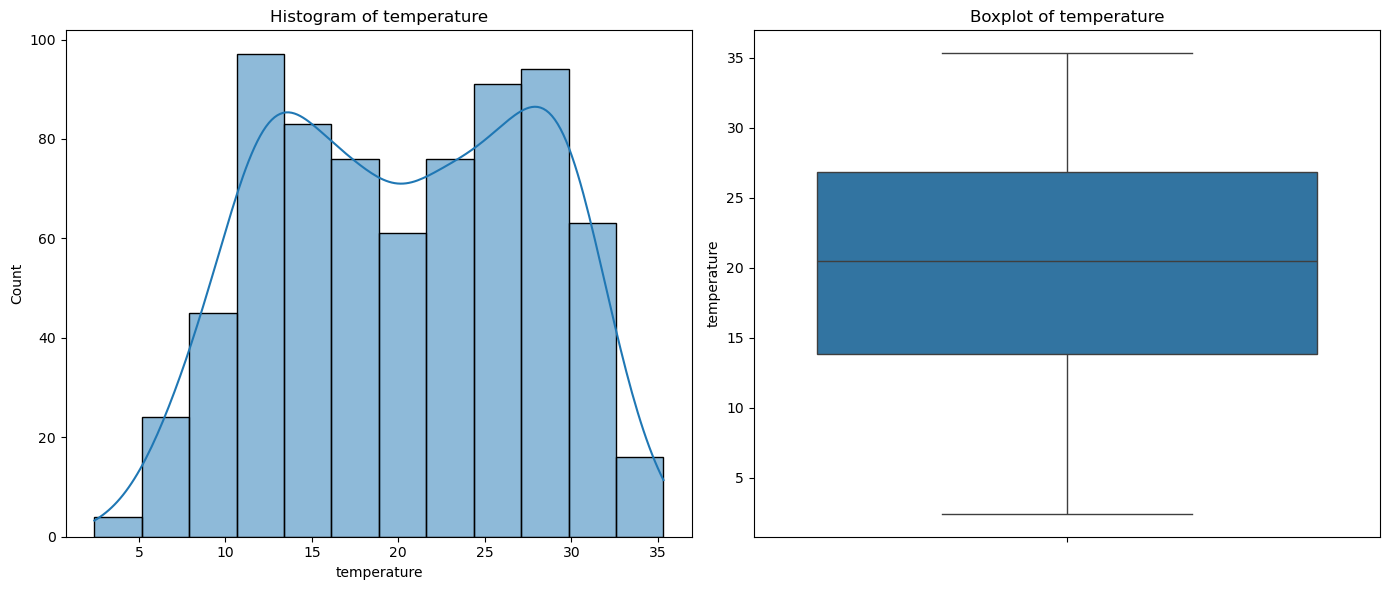

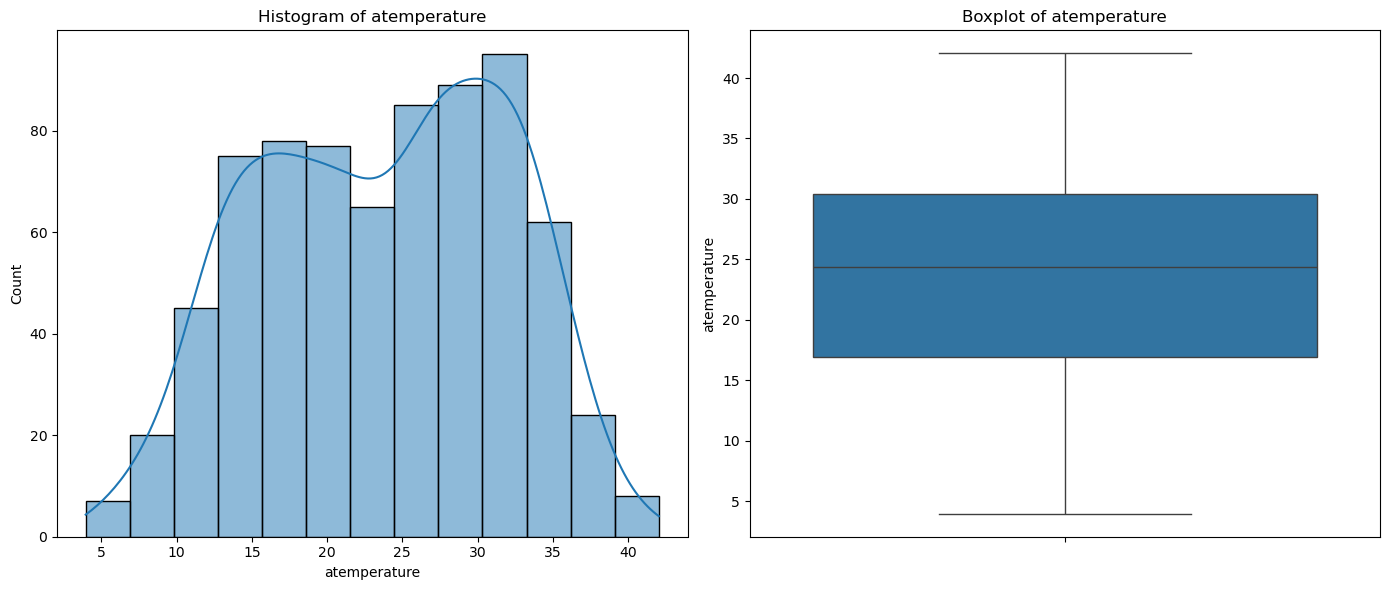

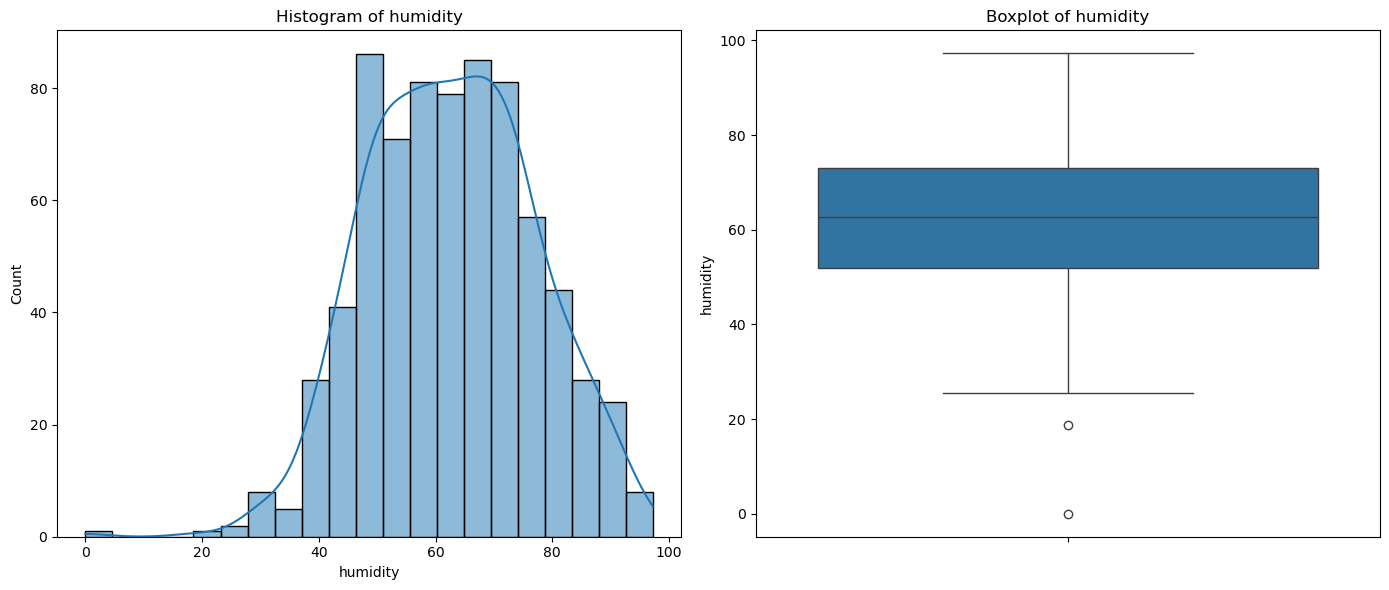

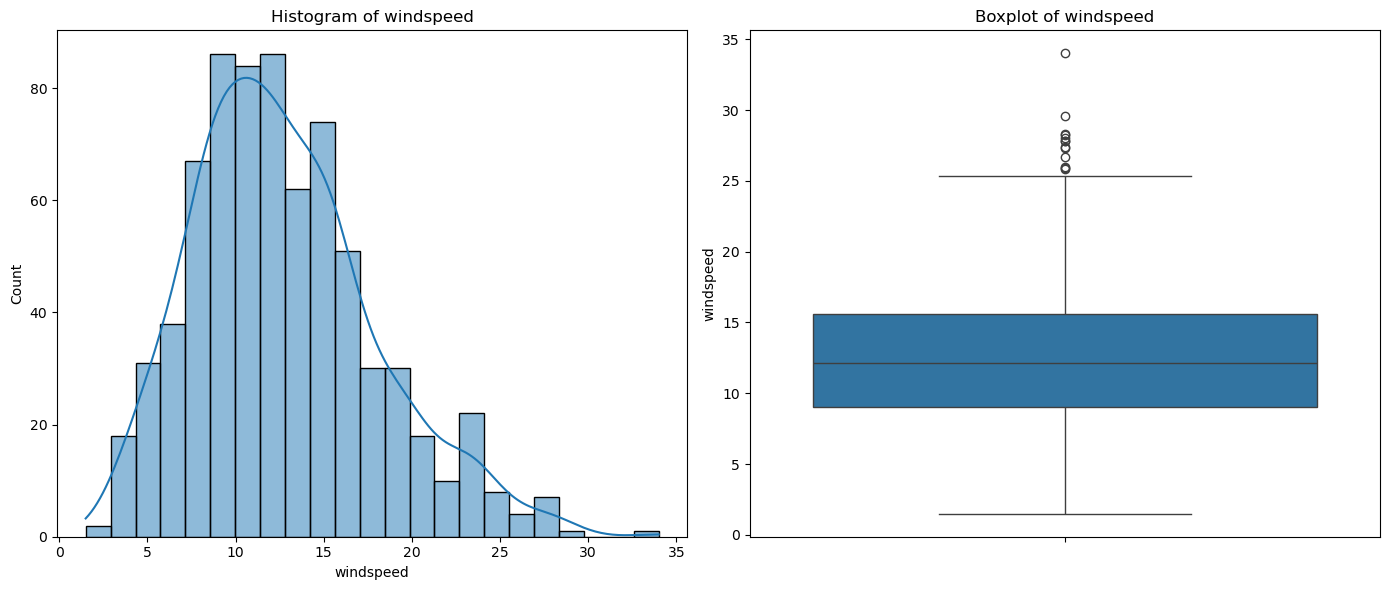

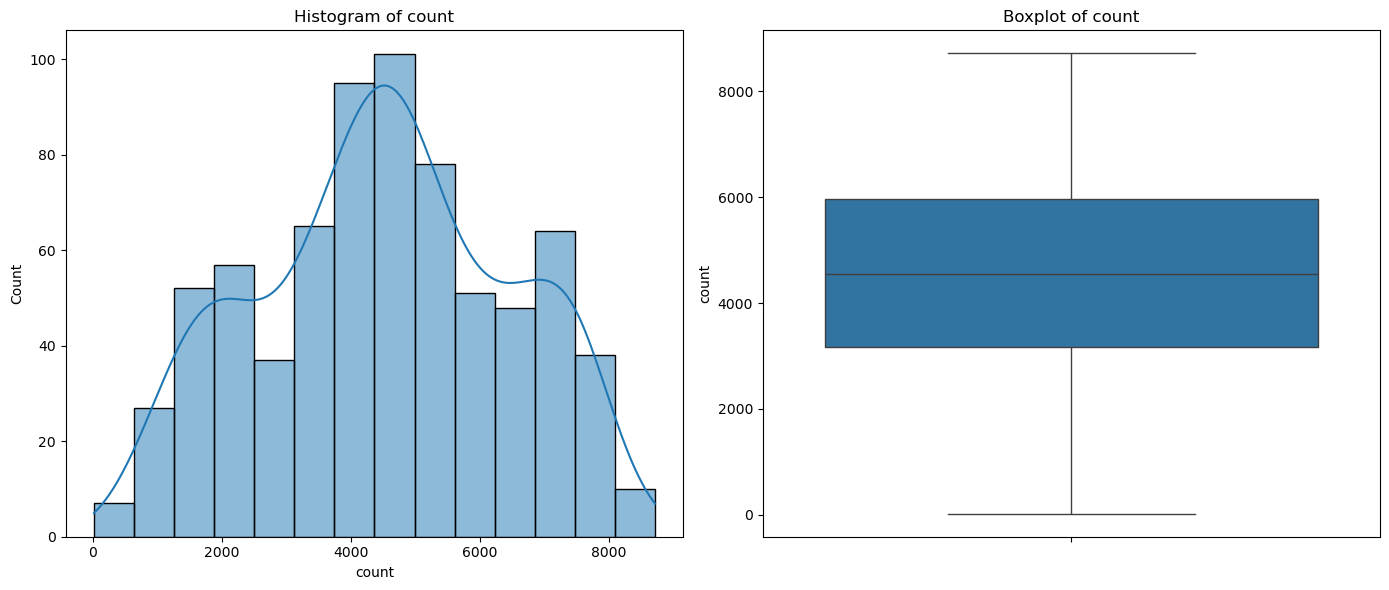

In [39]:
# Univariate Analysis for Numerical Variables
# Set up the plotting area
for var in numerical_vars:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(BS[var], kde=True)
    plt.title(f'Histogram of {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=var, data=BS)
    plt.title(f'Boxplot of {var}')
    plt.tight_layout()
    plt.show()

In [30]:
# Summary Statistics for Numerical Variables
summary_stats = BS[numerical_vars].describe()
print(summary_stats)

       temperature  atemperature    humidity   windspeed        count
count   730.000000    730.000000  730.000000  730.000000   730.000000
mean     20.319259     23.726322   62.765175   12.763620  4508.006849
std       7.506729      8.150308   14.237589    5.195841  1936.011647
min       2.424346      3.953480    0.000000    1.500244    22.000000
25%      13.811885     16.889713   52.000000    9.041650  3169.750000
50%      20.465826     24.368225   62.625000   12.125325  4548.500000
75%      26.880615     30.445775   72.989575   15.625589  5966.000000
max      35.328347     42.044800   97.250000   34.000021  8714.000000


In [31]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [33]:
# Remove outliers in both humidity and windspeed
columns_to_check = ['humidity', 'windspeed']
BS_day = BS.copy()  # Create a copy to preserve the original data
for col in columns_to_check:
    BS_day = remove_outliers(BS_day, col)


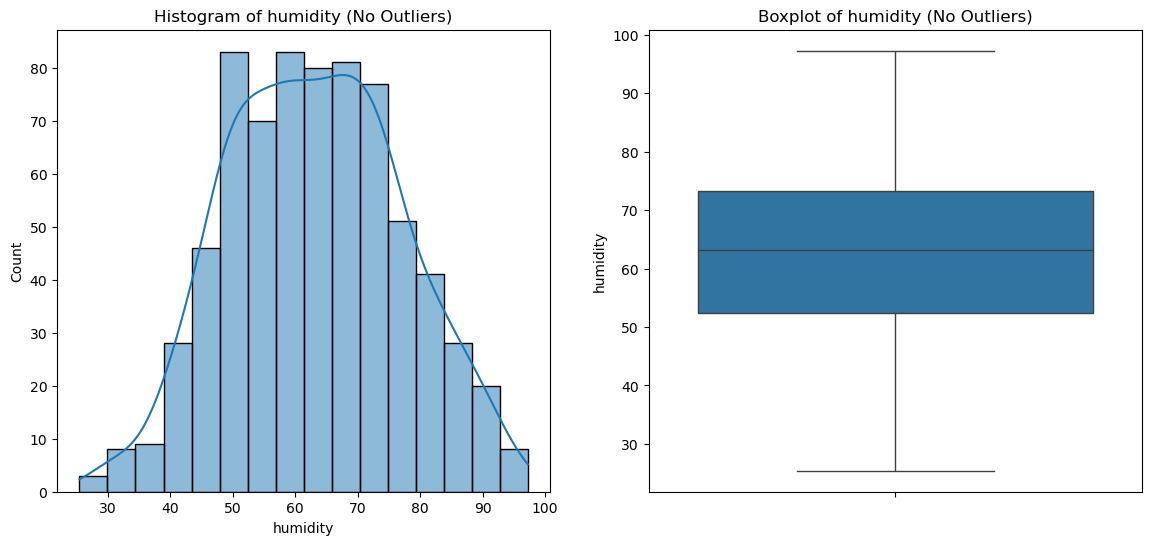

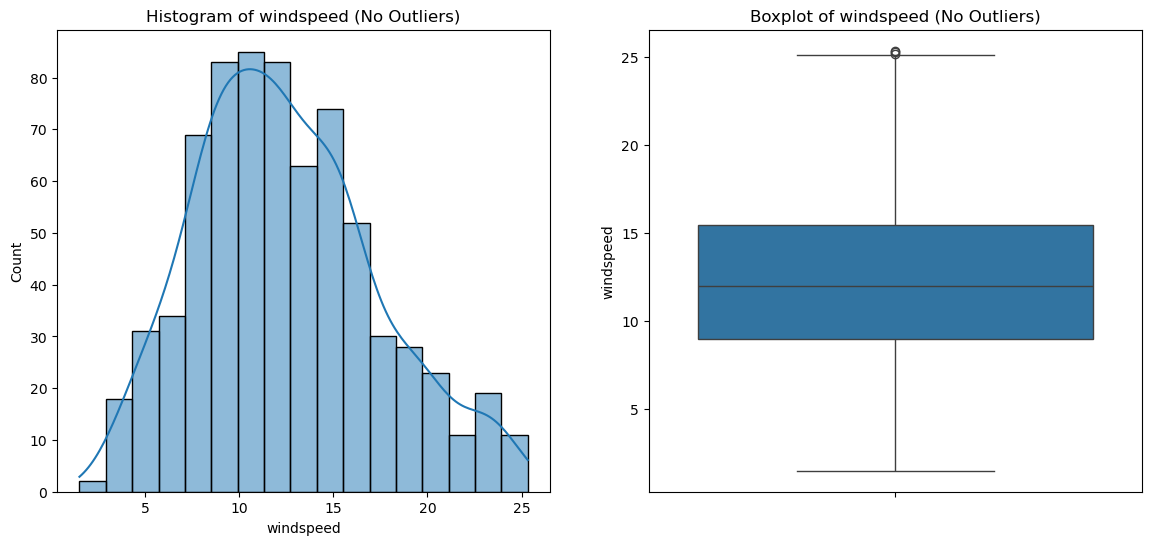

In [34]:
# Recheck the distribution of windspeed and humidity after removing outliers
for col in columns_to_check:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(BS_day[col], kde=True)
    plt.title(f'Histogram of {col} (No Outliers)')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=BS_day[col])
    plt.title(f'Boxplot of {col} (No Outliers)')

    plt.show()

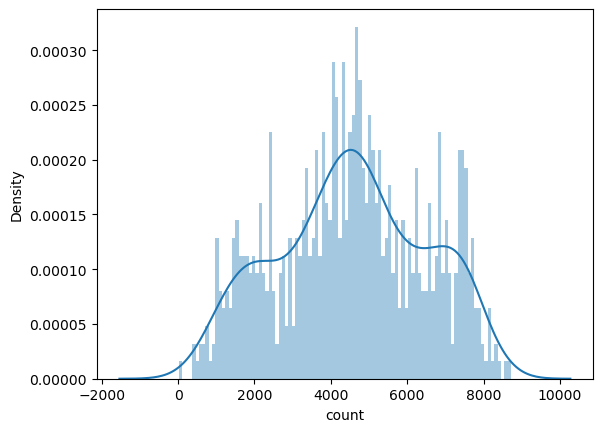

In [35]:
sns.distplot(BS_day['count'], bins=100)
plt.show()

##### Observation

The count variable has a skewed distribution with a peak around 1000-2000 and another smaller peak around 5000-6000. This suggests common usage patterns in these ranges. The presence of two peaks indicates that there might be two different usage patterns or periods (e.g., weekdays vs. weekends, or different seasons). 

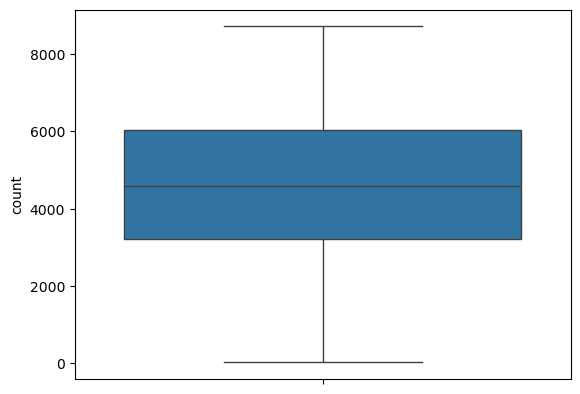

In [36]:
sns.boxplot(y=BS_day['count'])
plt.show()

##### Observation
There are no outliers in count variable

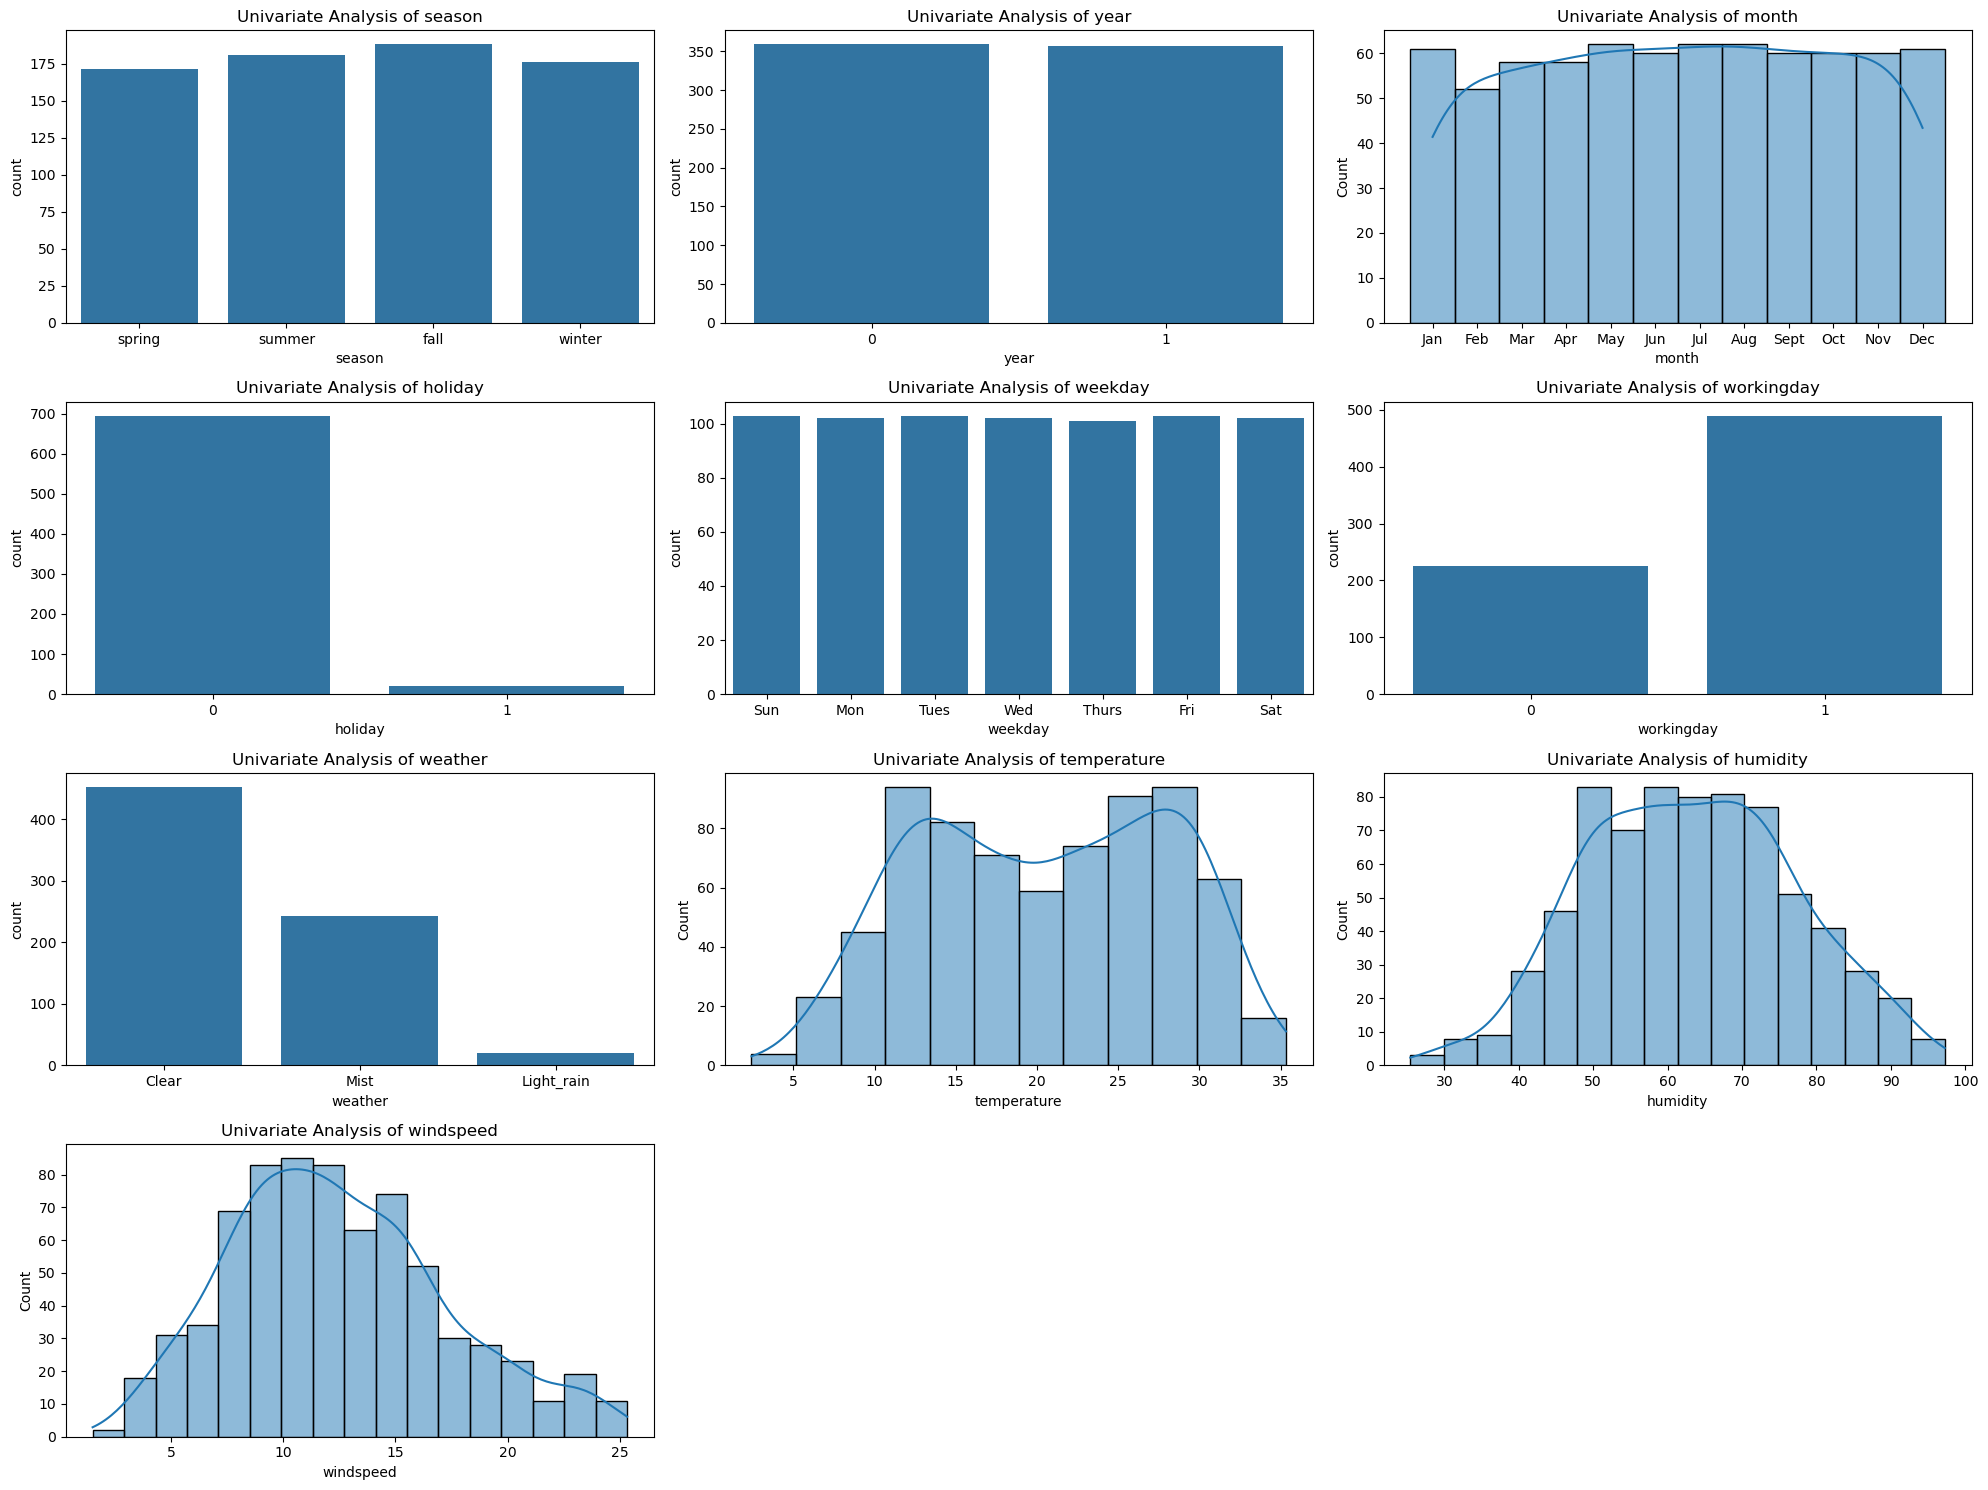

In [40]:
# List of columns to analyze
columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather', 'temperature', 'humidity', 'windspeed']

# Set up the plotting area
plt.figure(figsize=(20, 15))

# Loop through each column and create a subplot
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    # Get value counts for categorical columns
    if BS_day[column].dtype == 'object' or BS_day[column].nunique() < 10:
        value_counts = BS_day[column].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.xlabel(column)
        plt.ylabel('count')
    else:
        sns.histplot(data=BS_day, x=column, kde=True)
    plt.title(f'Univariate Analysis of {column}')

plt.tight_layout()
plt.show()

#### Observations:
- Most bike rides happen during clear weather and moderate temperatures.
- There are more rides on workdays and non-holidays.
- People tend to bike consistently throughout the week, but slightly less on Sundays.
- The ideal biking conditions are moderate temperatures, moderate humidity, and moderate wind speeds.

### Bivariate Analysis

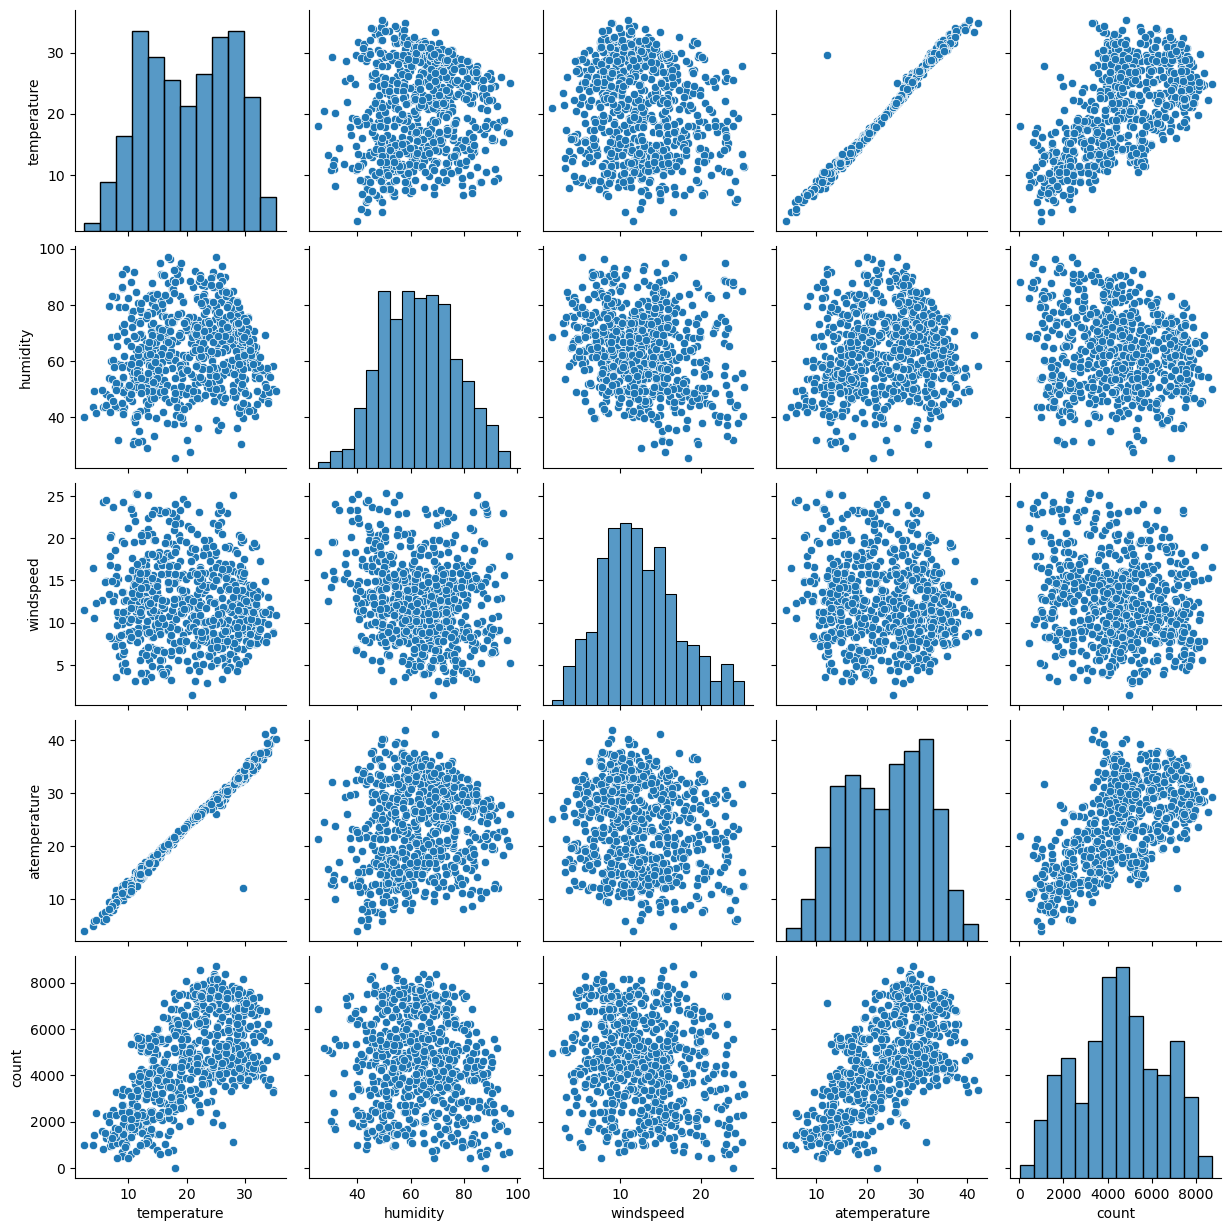

In [41]:
#Numeric columns analysis
num_cols = ['temperature','humidity','windspeed','atemperature','count']
sns.pairplot(BS_day[num_cols])
plt.show()

#### Visualising Categorical Variables


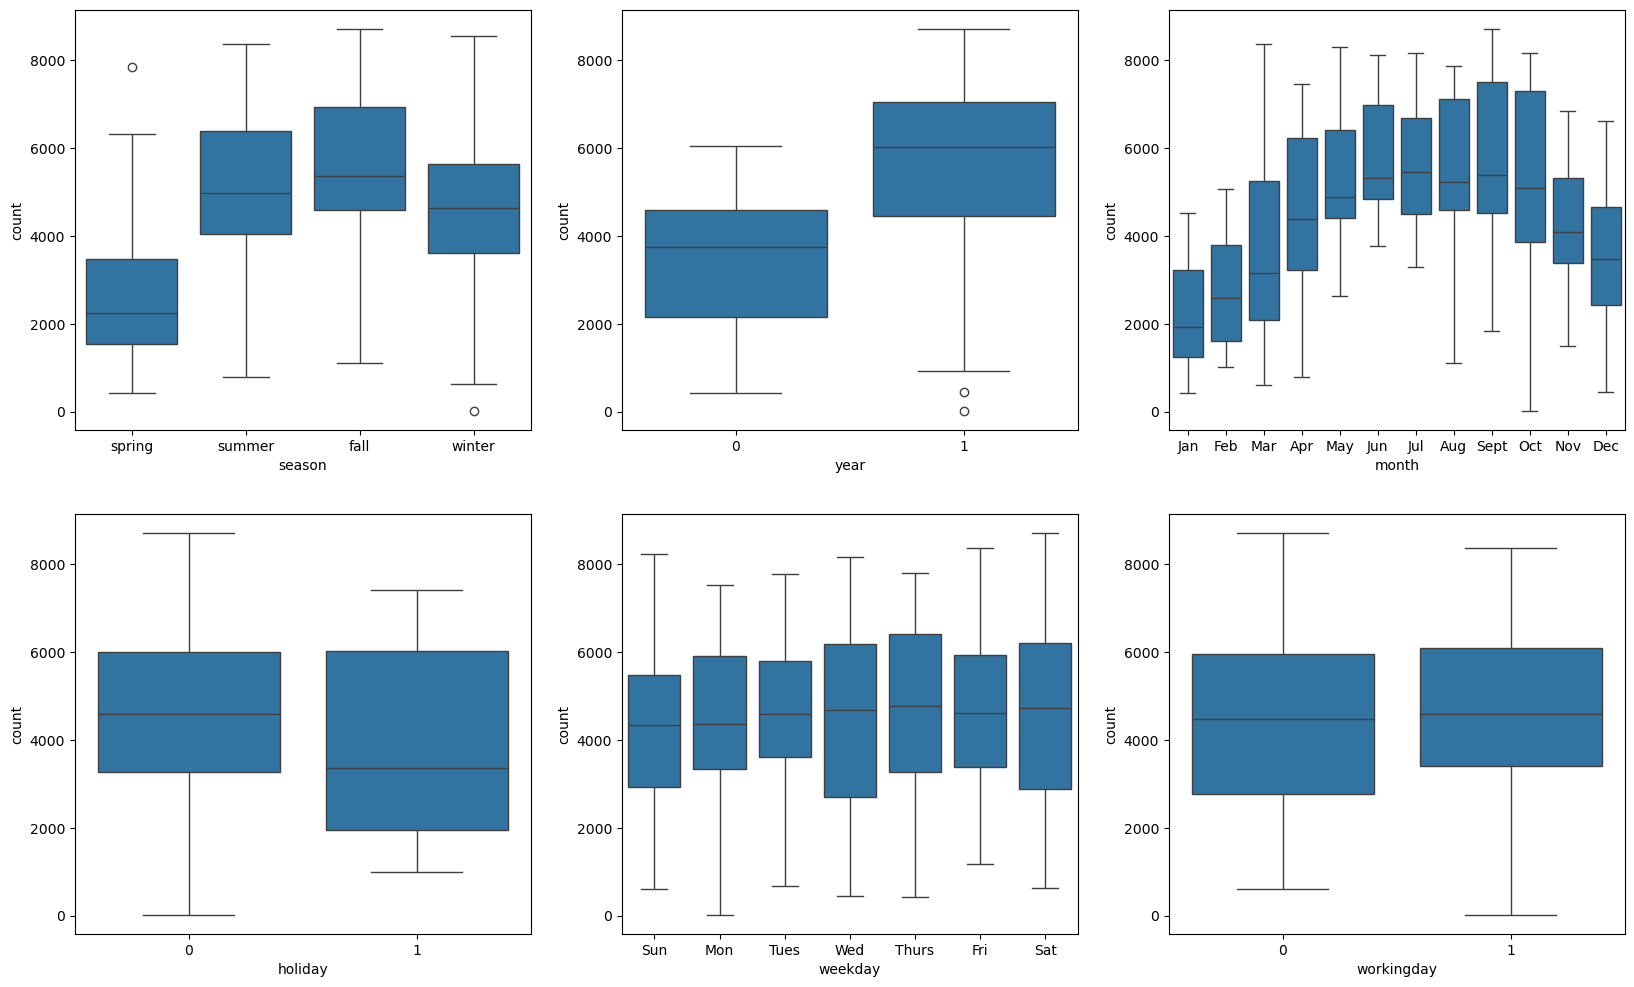

In [42]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = BS_day)
plt.subplot(2,3,2)
sns.boxplot(x = 'year', y = 'count', data = BS_day)
plt.subplot(2,3,3)
sns.boxplot(x = 'month', y = 'count', data = BS_day)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = BS_day)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = BS_day)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = BS_day)
plt.show()

##### Observation
Seasonal Demand: The demand for bikes varies significantly across different seasons, with some seasons showing higher median demand than others.

Yearly Trend: There is a noticeable increase in bike demand from one year to the next, indicating a growing trend in bike usage.

Monthly Variation: The demand fluctuates across different months, with certain months showing higher or lower demand.

Holiday Impact: Bike demand tends to be lower on holidays compared to non-holidays.

Weekday vs. Weekend: The demand for bikes varies across different weekdays, with some days showing higher usage.

Working Days: There is a difference in bike demand between working days and non-working days, with working days generally showing higher demand.

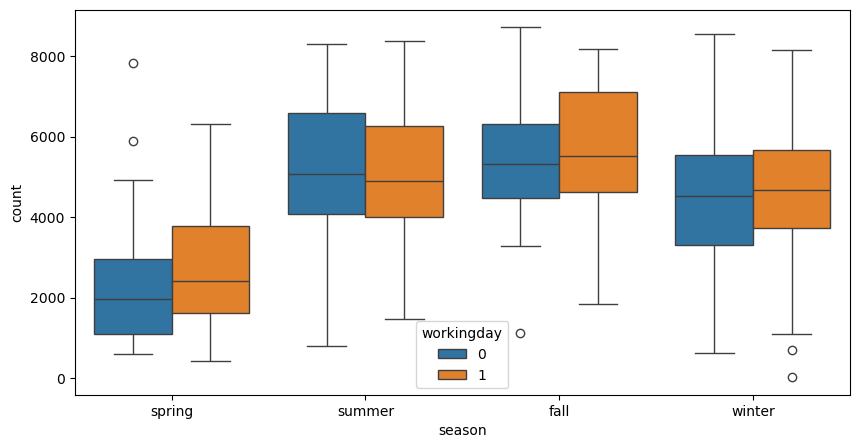

In [43]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'count', hue = 'workingday', data = BS_day)
plt.show()

##### Observations:
   The counts are generally higher in summer and fall, with more fluctuations in summer working days. Winter tends to have fewer counts on non-working days.

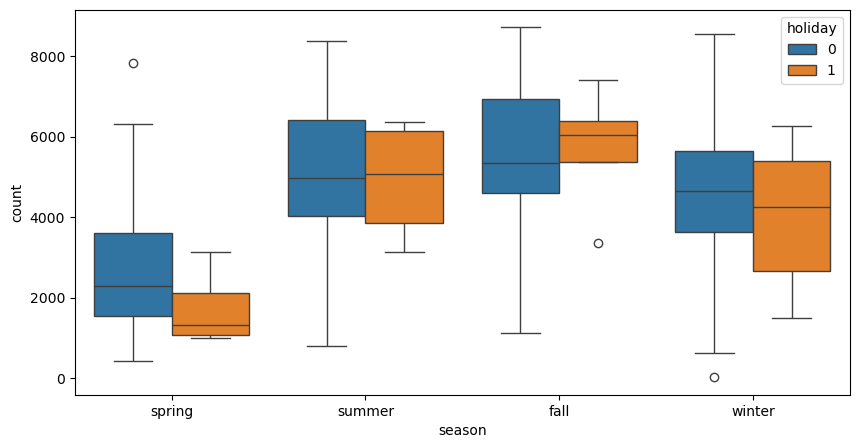

In [44]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'count', hue = 'holiday', data = BS_day)
plt.show()

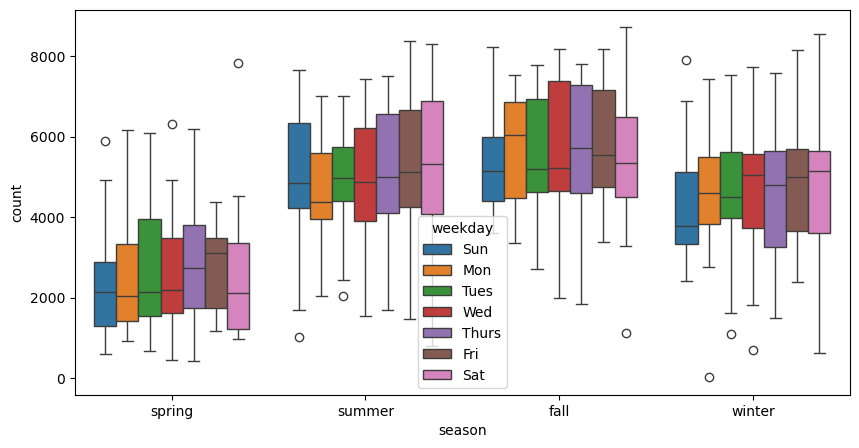

In [45]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'count', hue = 'weekday', data = BS_day)
plt.show()

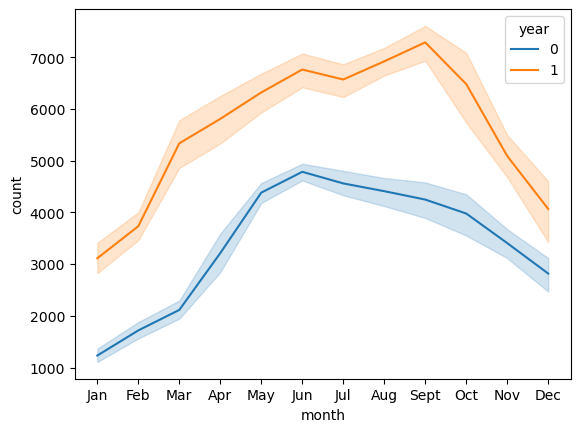

In [46]:
sns.lineplot(x='month',y='count',data=BS_day,hue='year')
plt.show()

##### Observation:
There are clear seasonal patterns in bike sharing counts. Both years show higher counts during the warmer months (May to September) and lower counts during the colder months (November to February).

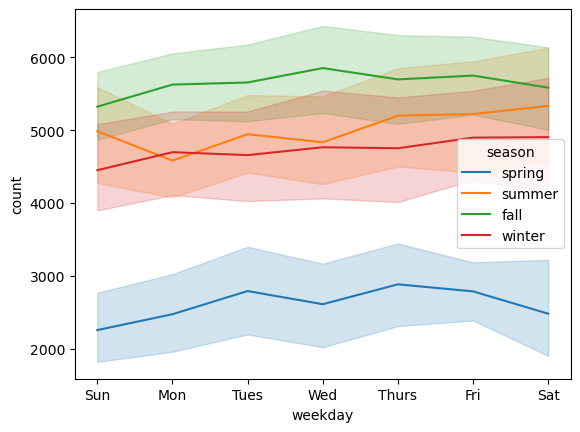

In [125]:
sns.lineplot(x='weekday',y='count',hue ='season',data=BS_day)
plt.show()

##### Observations:
There's a noticeable peak on Fridays across all seasons, indicating higher usage as people might be planning for weekend activities or commuting home. There is a dip in usage on Sundays and, to a lesser extent, on Saturdays, indicating reduced commuting and possibly more recreational usage.

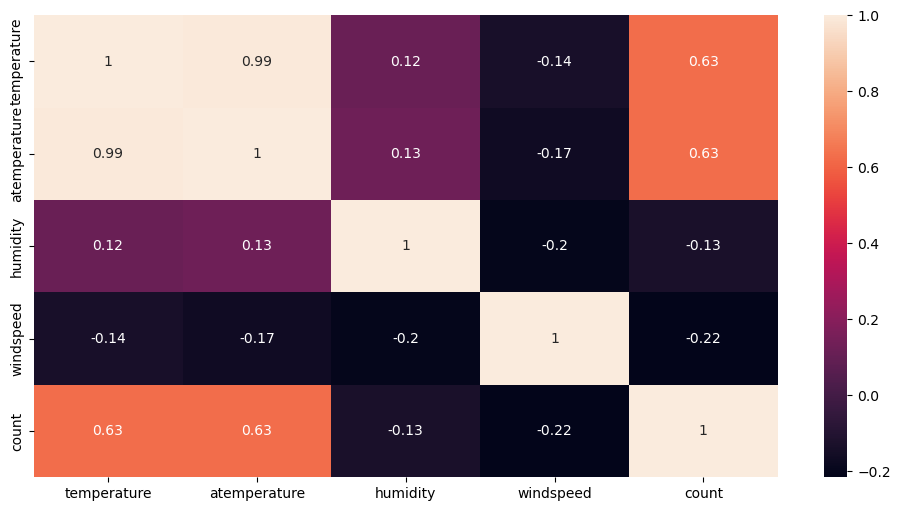

In [50]:
# Multivariate Analysis
num_cols = ['temperature','atemperature','humidity','windspeed','count']
plt.figure(figsize=(12,6))
sns.heatmap(BS_day[num_cols].corr(),annot=True)
plt.show()

##### Observation:

- 'temperature' and 'atemperature': These two variables are almost perfectly correlated (close to 1), indicating that they measure very similar aspects of temperature.Thus, while building the model, we'll have to pay attention to multicollinearity.
- 'temperature' and 'count': Higher temperatures seem to be associated with an increase in bike rentals.
- 'windspeed' and 'count': There is a slight negative correlation, indicating that higher wind speeds might reduce bike rentals.
- 'humidity' and 'count': Humidity has a weak negative correlation with bike rentals, suggesting that higher humidity might slightly deter bike usage.


Based on the analysis, ‘temperature’ and ‘atemperature’ are perfectly correlated. Additionally, according to the data dictionary, the ‘count’ of total rental bikes includes both casual and registered users. Therefore, we can drop these columns.

In [52]:
BS_day.drop(['atemperature'],axis=1,inplace=True)
BS_day.shape

(716, 11)

### Data Preparation

#### Creation of Dummy Variables (One Hot Encoding)

Wherever we have more than 2 categories in categorical features, we need to create dummies for them. The variables season, month, weekday, and weathersit have multiple categories. To convert these categories into numerical values, we will use dummy variables.

In [53]:
# Convert into dummies
BS_categorical = ['season','month','weekday','weather']
BS_dummies = pd.get_dummies(BS_day[BS_categorical], drop_first=True).astype(int)
BS_dummies.head()

,season_summer,season_fall,season_winter,month_Feb,month_Mar,month_Apr,month_May,month_Jun,month_Jul,month_Aug,...,month_Nov,month_Dec,weekday_Mon,weekday_Tues,weekday_Wed,weekday_Thurs,weekday_Fri,weekday_Sat,weather_Mist,weather_Light_rain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [54]:
# Drop categorical variable columns
BS_day1 = BS_day.drop(list(BS[BS_categorical].columns), axis=1)

In [55]:
# Concatenate dummy variables with the BS_day1 dataframe
BS_day1 = pd.concat([BS_day1, BS_dummies], axis=1)

In [56]:
# Let's check the first few rows
BS_day1.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,season_summer,season_fall,season_winter,...,month_Nov,month_Dec,weekday_Mon,weekday_Tues,weekday_Wed,weekday_Thurs,weekday_Fri,weekday_Sat,weather_Mist,weather_Light_rain
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [57]:
# Inspecting the columns in dataframe
BS_day1.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'count', 'season_summer', 'season_fall', 'season_winter', 'month_Feb',
       'month_Mar', 'month_Apr', 'month_May', 'month_Jun', 'month_Jul',
       'month_Aug', 'month_Sept', 'month_Oct', 'month_Nov', 'month_Dec',
       'weekday_Mon', 'weekday_Tues', 'weekday_Wed', 'weekday_Thurs',
       'weekday_Fri', 'weekday_Sat', 'weather_Mist', 'weather_Light_rain'],
      dtype='object')

In [58]:
BS_day1.shape

(716, 29)

### Splitting the dataset into training and test set

In [59]:
# Getting the feature variables in X and target variable `count` in y
X = BS_day1.drop('count', axis = 1)
y = BS_day1['count']

In [60]:
# Splitting the data into a 80% training set and a 20% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
# Checking shape and size for train and test set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(572, 28)
(572,)
(144, 28)
(144,)


In [62]:
# Inspect the head of the training set
X_train.head()

,year,holiday,workingday,temperature,humidity,windspeed,season_summer,season_fall,season_winter,month_Feb,...,month_Nov,month_Dec,weekday_Mon,weekday_Tues,weekday_Wed,weekday_Thurs,weekday_Fri,weekday_Sat,weather_Mist,weather_Light_rain
58,0,0,1,16.698193,87.6364,19.408962,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
209,0,0,1,34.371653,54.2500,11.667246,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
325,0,0,1,17.083347,96.2500,7.959064,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
541,1,0,1,25.864153,37.3333,23.292014,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
24,0,0,1,9.162598,61.6957,8.696332,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Rescaling the Features

If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

We will use MinMax scaling.


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [64]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temperature','humidity','windspeed']

# Fit and transform the training set
X_train_scaled = X_train.copy()  # Create a copy of the original training data
X_train_scaled[num_vars] = scaler.fit_transform(X_train[num_vars])

In [65]:
# Only transform the test set
X_test_scaled = X_test.copy()  # Create a copy of the original test data
X_test_scaled[num_vars] = scaler.transform(X_test[num_vars])

In [66]:
# Ensure that the scaled dataframes have the correct columns and index
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)

In [67]:
X_train_scaled.head()

,year,holiday,workingday,temperature,humidity,windspeed,season_summer,season_fall,season_winter,month_Feb,...,month_Nov,month_Dec,weekday_Mon,weekday_Tues,weekday_Wed,weekday_Thurs,weekday_Fri,weekday_Sat,weather_Mist,weather_Light_rain
58,0,0,1,0.433803,0.866168,0.751426,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
209,0,0,1,0.970925,0.401392,0.426594,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
325,0,0,1,0.445508,0.986079,0.271003,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
541,1,0,1,0.712370,0.165892,0.914353,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
24,0,0,1,0.204785,0.505044,0.301938,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [68]:
X_train_scaled.describe()

,year,holiday,workingday,temperature,humidity,windspeed,season_summer,season_fall,season_winter,month_Feb,...,month_Nov,month_Dec,weekday_Mon,weekday_Tues,weekday_Wed,weekday_Thurs,weekday_Fri,weekday_Sat,weather_Mist,weather_Light_rain
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,0.508741,0.029720,0.664336,0.552183,0.519969,0.461276,0.253497,0.267483,0.244755,0.069930,...,0.087413,0.078671,0.141608,0.131119,0.136364,0.146853,0.138112,0.152098,0.321678,0.026224
std,0.500361,0.169963,0.472636,0.228240,0.189825,0.204564,0.435393,0.443034,0.430318,0.255252,...,0.282686,0.269461,0.348953,0.337826,0.343475,0.354269,0.345319,0.359430,0.467529,0.159940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353871,0.372244,0.312955,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.565959,0.515661,0.436209,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746117,0.661398,0.585878,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


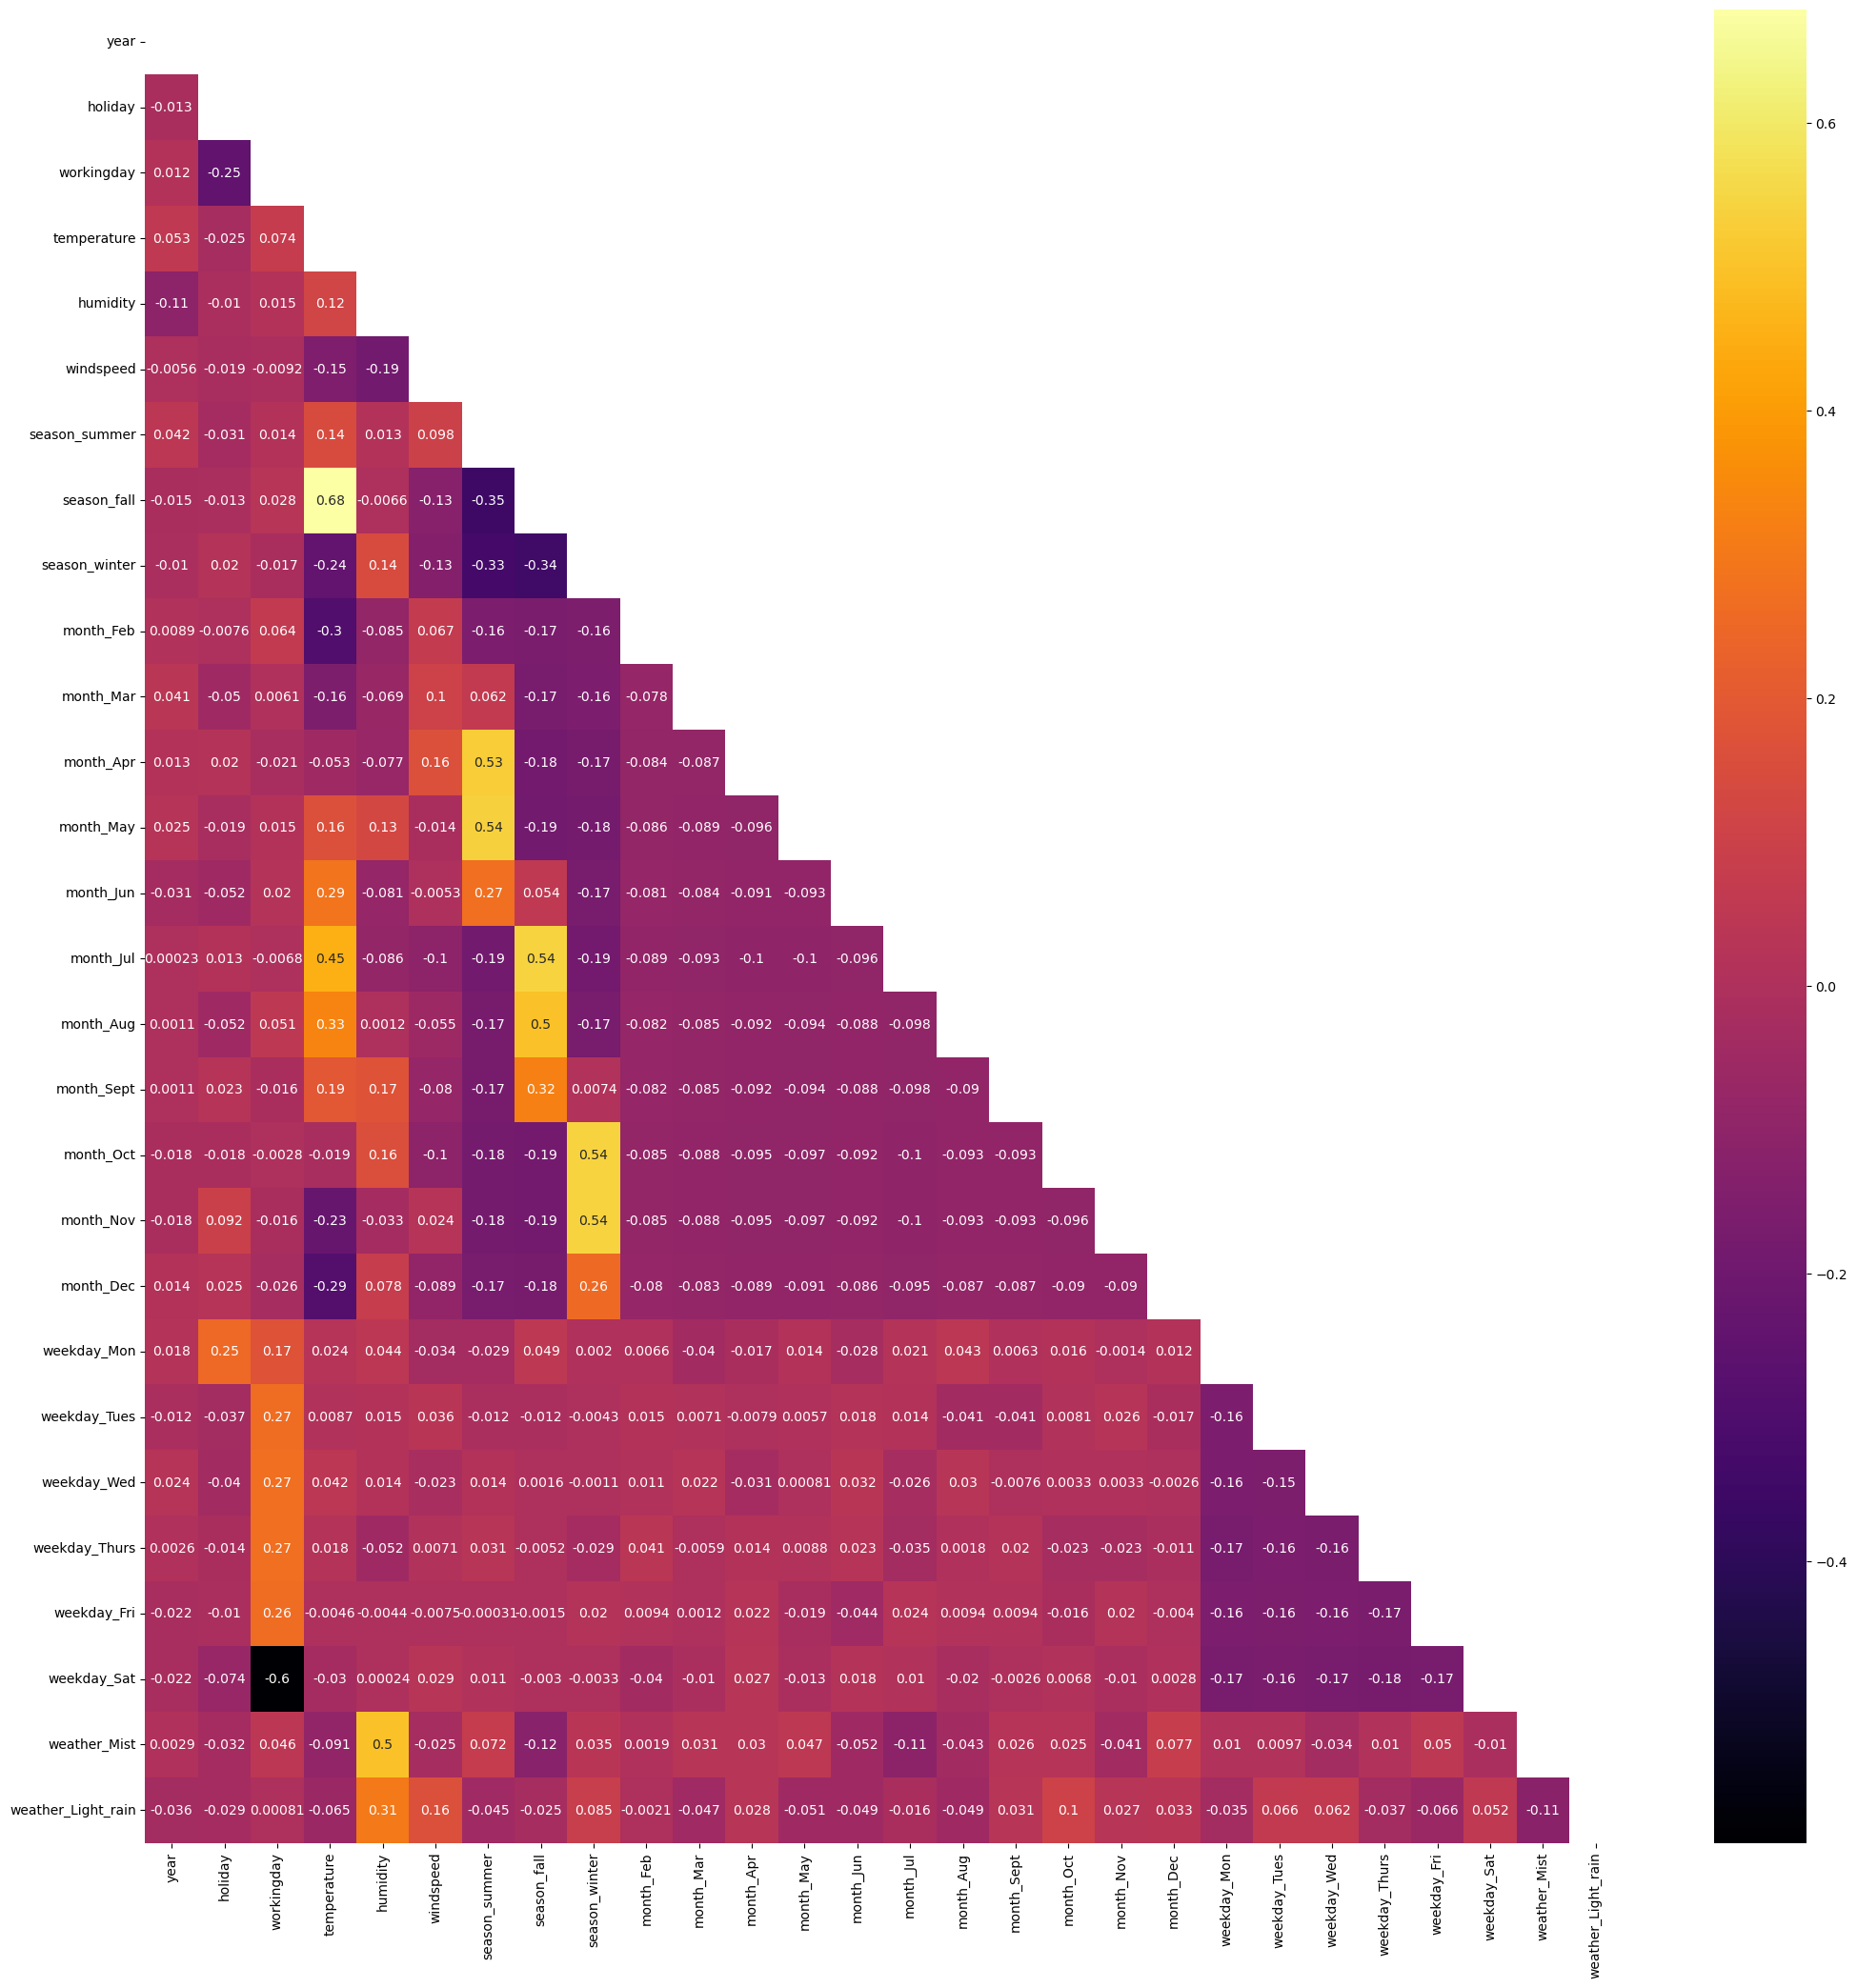

In [69]:
# Inspecting the correlation in the training dataframe
plt.figure(figsize = (25, 25))
matrix = np.triu(X_train_scaled.corr())
sns.heatmap(X_train_scaled.corr(), annot = True, cmap = "inferno", mask = matrix)
plt.show()

## Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### Building the first model with all the features

In [70]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_scaled)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [71]:
lr.params

const                 1255.662635
year                  2024.967005
holiday               -215.871086
workingday             370.185463
temperature           3572.387558
humidity             -1131.022919
windspeed             -864.362699
season_summer          946.733317
season_fall           1019.482952
season_winter         1671.974083
month_Feb              162.065464
month_Mar              503.406901
month_Apr              404.069171
month_May              671.073732
month_Jun              427.116273
month_Jul             -205.430643
month_Aug              218.432396
month_Sept             922.723905
month_Oct              459.205267
month_Nov             -233.856846
month_Dec             -168.446435
weekday_Mon           -128.158565
weekday_Tues            79.338046
weekday_Wed            100.321806
weekday_Thurs           33.052935
weekday_Fri             69.760154
weekday_Sat            448.877100
weather_Mist          -461.975874
weather_Light_rain   -2069.925488
dtype: float64

In [72]:
from sklearn.linear_model import LinearRegression

# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [73]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2024.96700454  -215.87108605   370.18546251  3572.3875583
 -1131.02291928  -864.36269873   946.73331677  1019.48295178
  1671.97408271   162.06546353   503.4069015    404.06917134
   671.07373177   427.1162728   -205.43064345   218.43239572
   922.72390479   459.20526661  -233.85684614  -168.44643498
  -128.15856538    79.33804636   100.32180573    33.0529353
    69.76015446   448.87709981  -461.97587415 -2069.92548752]
1255.6626346415642


In [74]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.7
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          8.28e-205
Time:                        22:53:46   Log-Likelihood:                -4595.2
No. Observations:                 572   AIC:                             9246.
Df Residuals:                     544   BIC:                             9368.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1255.6626    203.514      6.170      0.000     855.893    1655.432
year                2024.9670     65.931     30.714      0.000    1895.457    2154.477
holiday             -215.8711    176.932     -1.220      0.223    -563.424     131.682
workingday           370.1855     73.603      5.029      0.000     225.605     514.766
temperature         3572.3876    370.405      9.645      0.000    2844.788    4299.987
humidity           -1131.0229    250.609     -4.513      0.000   -1623.302    -638.744
windspeed           -864.3627    173.271     -4.988      0.000   -1204.725    -524.000
season_summer        946.7333    213.227      4.440      0.000     527.885    1365.582
season_fall         1019.4830    245.585      4.151      0.000     537.073    1501.893
season_winter       1671.9741    208.608      8.015      0.000    1262.199    2081.749
month_Feb            162.0655    166.449      0.974      0.331    -164.896     489.027
month_Mar            503.4069    191.177      2.633      0.009     127.872     878.942
month_Apr            404.0692    283.955      1.423      0.155    -153.713     961.851
month_May            671.0737    306.212      2.192      0.029      69.571    1272.576
month_Jun            427.1163    319.149      1.338      0.181    -199.798    1054.031
month_Jul           -205.4306    354.464     -0.580      0.562    -901.716     490.855
month_Aug            218.4324    342.413      0.638      0.524    -454.182     891.046
month_Sept           922.7239    303.010      3.045      0.002     327.511    1517.937
month_Oct            459.2053    276.340      1.662      0.097     -83.619    1002.029
month_Nov           -233.8568    262.506     -0.891      0.373    -749.506     281.792
month_Dec           -168.4464    206.675     -0.815      0.415    -574.425     237.532
weekday_Mon         -128.1586     81.210     -1.578      0.115    -287.682      31.365
weekday_Tues          79.3380     89.741      0.884      0.377     -96.943     255.619
weekday_Wed          100.3218     88.264      1.137      0.256     -73.058     273.702
weekday_Thurs         33.0529     85.151      0.388      0.698    -134.212     200.318
weekday_Fri           69.7602     86.810      0.804      0.422    -100.764     240.285
weekday_Sat          448.8771    116.127      3.865      0.000     220.765     676.989
weather_Mist        -461.9759     88.724     -5.207      0.000    -636.259    -287.693
weather_Light_rain -2069.9255    241.043     -8.587      0.000   -2543.414   -1596.437
==============================================================================
Omnibus:                       80.354   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.330
Skew:                          -0.769   Prob(JB):             

### Selecting Features using Recursive Feature Elimination (RFE) approach

RFE, or Recursive Feature Elimination, is a feature selection technique in machine learning. It works by recursively removing the least important features based on model performance, helping to identify the most relevant features for optimal model accuracy and efficiency.

##### Selecting top 15 features generated using RFE

In [76]:
# Import RFE
from sklearn.feature_selection import RFE

# Create and train the model with RFE

lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)

rfe = rfe.fit(X_train_scaled, y_train)

In [77]:
rfe.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
        True])

In [78]:
# List of feature variables and their respective selection status and ranks
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 10),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('month_Feb', False, 9),
 ('month_Mar', False, 2),
 ('month_Apr', False, 5),
 ('month_May', False, 3),
 ('month_Jun', False, 6),
 ('month_Jul', True, 1),
 ('month_Aug', False, 8),
 ('month_Sept', True, 1),
 ('month_Oct', False, 4),
 ('month_Nov', True, 1),
 ('month_Dec', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Tues', False, 12),
 ('weekday_Wed', False, 11),
 ('weekday_Thurs', False, 14),
 ('weekday_Fri', False, 13),
 ('weekday_Sat', True, 1),
 ('weather_Mist', True, 1),
 ('weather_Light_rain', True, 1)]

In [79]:
# Get the columns which are selected using RFE approach
selected_features = X_train_scaled.columns[rfe.support_]

In [80]:
# Verifying column names which are selected
selected_features

Index(['year', 'workingday', 'temperature', 'humidity', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'month_Jul',
       'month_Sept', 'month_Nov', 'month_Dec', 'weekday_Sat', 'weather_Mist',
       'weather_Light_rain'],
      dtype='object')

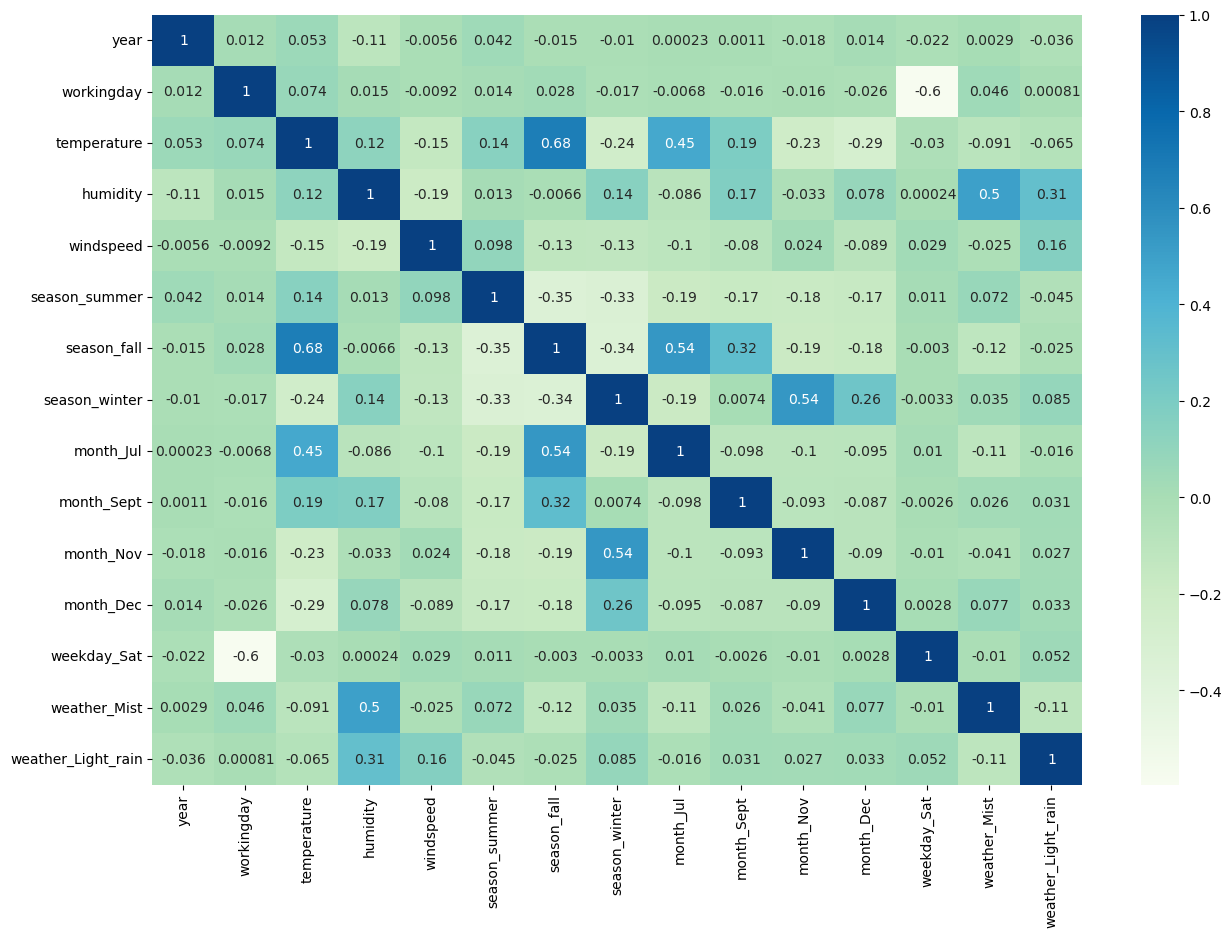

In [159]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(X_train_scaled[selected_features].corr(), cmap='GnBu', annot=True)
plt.show()

In [81]:
# Get the columns which are rejected using RFE approach
rejected_features = X_train_scaled.columns[~rfe.support_]

In [82]:
# Verifying column names which are rejected
rejected_features

Index(['holiday', 'month_Feb', 'month_Mar', 'month_Apr', 'month_May',
       'month_Jun', 'month_Aug', 'month_Oct', 'weekday_Mon', 'weekday_Tues',
       'weekday_Wed', 'weekday_Thurs', 'weekday_Fri'],
      dtype='object')

### Common Utility Functions

Here are three Python utility methods designed for reuse in modeling, VIF calculation, and adjusted R2 score calculation.

In [128]:
from sklearn.metrics import mean_squared_error

#Function to calculate Adjusted R2
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    return adjusted_r2

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Function to calculate VIF
def calculate_VIF(X_train):
    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
    
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = 'VIF', ascending = False)

In [130]:
#Function to generate model summary
def generate_model_with_summary(X_train, y_train):
    X_train_sm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return { 'model' : lm, 'X_train_sm' : X_train_sm }

### Manual Feature Elimination using `statsmodels` and `VIF`

Steps to be taken while performing Manual Feature Elimination:

- **Multicollinearity:** Address high correlation between features.
- **Overfitting:** Prevent the model from fitting noise in the data.
- **Interpretability:** Simplify the model for better understanding.
- **Model Performance:** Improve computational efficiency and generalization.
- **Data Quality:** Eliminate irrelevant or redundant features for cleaner data.

###### Manual feature elimination requires identifying features with p-values exceeding 0.05, rendering their coefficients statistically insignificant, and having VIF values surpassing 5.

### Model 1

Creating our first model using the selected features from RFE approach

In [86]:
X_train_rfe_1 = X_train_scaled[selected_features]

In [87]:
generate_model_with_summary(X_train_rfe_1, y_train)
calculate_VIF(X_train_rfe_1)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          4.11e-214
Time:                        22:58:30   Log-Likelihood:                -4604.5
No. Observations:                 572   AIC:                             9241.
Df Residuals:                     556   BIC:                             9311.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1298.1355    189

,Features,VIF
2,temperature,25.57
3,humidity,12.63
6,season_fall,7.61
4,windspeed,4.64
1,workingday,4.18
7,season_winter,3.84
5,season_summer,3.76
13,weather_Mist,2.33
0,year,2.02
10,month_Nov,1.88


### Model2
Excluding `month_Dec` due to its p-value of 0.001

In [88]:
X_train_rfe_2 = X_train_rfe_1.drop(['month_Dec'], axis = 1)

In [89]:
generate_model_with_summary(X_train_rfe_2, y_train)
calculate_VIF(X_train_rfe_2)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     213.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          5.93e-213
Time:                        23:00:33   Log-Likelihood:                -4610.1
No. Observations:                 572   AIC:                             9250.
Df Residuals:                     557   BIC:                             9315.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1182.9674    187

,Features,VIF
2,temperature,24.38
3,humidity,12.08
6,season_fall,7.51
4,windspeed,4.61
1,workingday,4.17
5,season_summer,3.76
7,season_winter,3.46
12,weather_Mist,2.32
0,year,2.00
8,month_Jul,1.86


### Model 3

- Removing `month_Nov` because it has p-value 0.003

In [90]:
X_train_rfe_3 = X_train_rfe_2.drop(['month_Nov'], axis = 1)

In [91]:
generate_model_with_summary(X_train_rfe_3, y_train)
calculate_VIF(X_train_rfe_3)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     225.6
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          2.83e-212
Time:                        23:02:52   Log-Likelihood:                -4614.5
No. Observations:                 572   AIC:                             9257.
Df Residuals:                     558   BIC:                             9318.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1149.6820    188

,Features,VIF
2,temperature,23.52
3,humidity,12.08
6,season_fall,7.24
4,windspeed,4.47
1,workingday,4.17
5,season_summer,3.69
7,season_winter,2.50
11,weather_Mist,2.31
0,year,2.00
8,month_Jul,1.86


### Model 4

- When i removed 'temperature' adjusted r2 reduced to 76.4 so removing 'humidity' because it has a second high VIF of 12.08

In [136]:
X_train_rfe_4 = X_train_rfe_3.drop(['humidity'], axis = 1)

In [137]:
generate_model_with_summary(X_train_rfe_4, y_train)
calculate_VIF(X_train_rfe_4)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          1.03e-208
Time:                        10:31:26   Log-Likelihood:                -4625.8
No. Observations:                 572   AIC:                             9278.
Df Residuals:                     559   BIC:                             9334.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                648.3898    158

,Features,VIF
2,temperature,17.22
5,season_fall,6.95
3,windspeed,4.41
1,workingday,4.03
4,season_summer,3.62
6,season_winter,2.47
0,year,2.00
7,month_Jul,1.84
9,weekday_Sat,1.67
10,weather_Mist,1.49


### Model 5

- Remove (`month_July`) because it has a p-value of 0.002 

In [100]:
X_train_rfe_5 = X_train_rfe_4.drop(['month_Jul'], axis = 1)

In [101]:
generate_model_with_summary(X_train_rfe_5, y_train)
calculate_VIF(X_train_rfe_5)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     250.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          7.89e-208
Time:                        23:11:06   Log-Likelihood:                -4630.7
No. Observations:                 572   AIC:                             9285.
Df Residuals:                     560   BIC:                             9338.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                671.3554    160

,Features,VIF
2,temperature,16.65
5,season_fall,6.58
3,windspeed,4.38
1,workingday,4.02
4,season_summer,3.58
6,season_winter,2.46
0,year,1.99
8,weekday_Sat,1.67
9,weather_Mist,1.49
7,month_Sept,1.25


### Model 6

- When i removed 'temperature' adjusted r2 reduced to 76.4 so removing 'season_fall' because it has a second high VIF of 6.58

In [140]:
X_train_rfe_6 = X_train_rfe_5.drop(['season_fall'], axis = 1)

In [141]:
final_lr_model = generate_model_with_summary(X_train_rfe_6, y_train)
calculate_VIF(X_train_rfe_6)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     263.9
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          9.79e-205
Time:                        10:33:42   Log-Likelihood:                -4640.9
No. Observations:                 572   AIC:                             9304.
Df Residuals:                     561   BIC:                             9352.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                544.2953    160

,Features,VIF
2,temperature,4.99
3,windspeed,4.22
1,workingday,3.99
0,year,1.98
7,weekday_Sat,1.66
4,season_summer,1.60
8,weather_Mist,1.49
5,season_winter,1.40
6,month_Sept,1.19
9,weather_Light_rain,1.09


#### The model is deemed satisfactory with a remarkably low Prob (F-statistic) of , features displaying low p-values and VIF, and $R^2$ and Adjusted $R^2$ values of 0. and 0., slightly lower than model 5. This will serve as the final evaluation model.

###### This marks the final model, and we will now assess its performance on the training set.

### Model Evaluation

### Residual Analysis

Residual analysis is performed to assess the goodness of fit and identify patterns or anomalies in the model's predictions.

In [142]:
# Fetch the final model and the X_train_sm from the final_lr_model
model, X_train_sm = final_lr_model.values()

In [143]:
# Calculate y_train_pred
y_train_pred = model.predict(X_train_sm)

Linear regression models are based on several key assumptions:

1. **Linearity:** The relationship between the independent and dependent variables is assumed to be linear.

2. **Independence:** Residuals (the differences between observed and predicted values) should be independent of each other.

3. **Homoscedasticity:** The variance of residuals should be constant across all levels of the independent variables, indicating consistent levels of variability.

4. **Normality of Residuals:** The residuals should be approximately normally distributed.

5. **No Perfect Multicollinearity:** Independent variables should not exhibit high correlation with each other, avoiding multicollinearity issues.

Violation of these assumptions can affect the accuracy and reliability of the linear regression model, and diagnostic checks are often performed to assess adherence to these assumptions.

<Figure size 800x500 with 0 Axes>

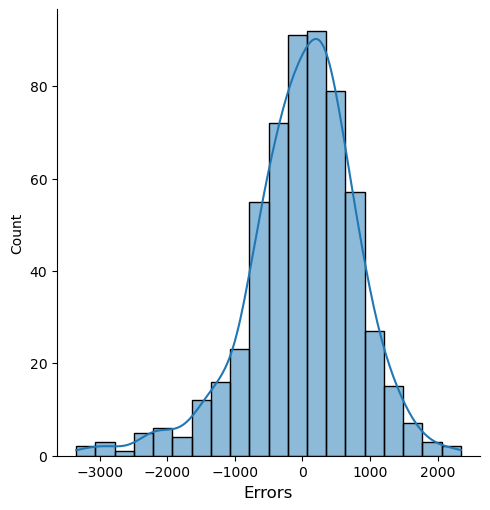

In [144]:
# Plot the histogram of the error terms on the training set
residuals = y_train - y_train_pred
fig = plt.figure(figsize = (8, 5))
sns.displot(residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

- ***The error terms follow the principle of a normal distribution curve.***

### Homoscedasticity

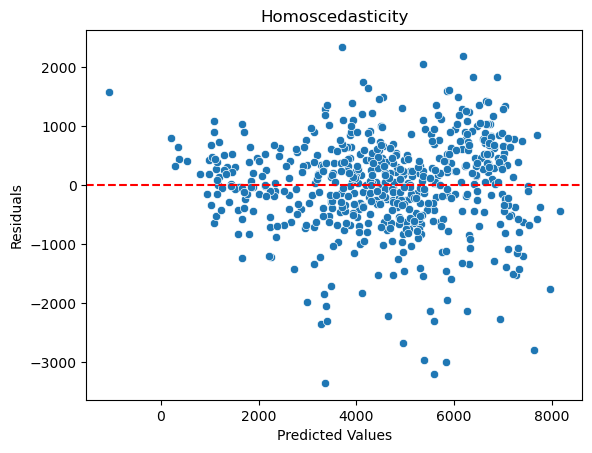

In [145]:
# Visualize Homoscedasticity
sns.scatterplot(x = y_train_pred, y = residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

- ***The variance of residuals is constant across all levels of the independent variables, indicating consistent levels of variability.***

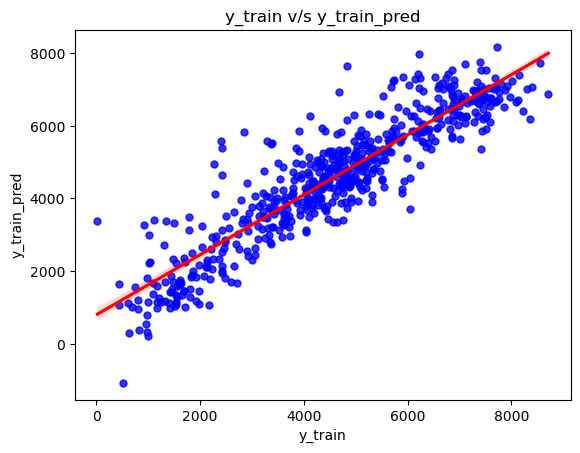

In [146]:
# Visualize the trained model using a scatter plot with a linear regression fit line
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred') 
plt.show()

In [147]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)

print(rmse_train)

807.9885813764851


##### The linear model's assumptions hold, indicating it is well-trained and ready for testing on the test set.

### Predict Using the Final Model on the test set

In [148]:
# Retain only the selected feature from the final model
X_test_scaled = X_test_scaled[X_train_rfe_6.columns]
X_test_scaled.head()

,year,workingday,temperature,windspeed,season_summer,season_winter,month_Sept,weekday_Sat,weather_Mist,weather_Light_rain
125,0,1,0.523386,0.578704,1,0,0,0,0,0
337,0,0,0.338555,0.173078,0,1,0,0,0,0
39,0,1,0.094267,0.467921,0,0,0,0,1,0
648,1,1,0.468352,0.447560,0,1,0,0,0,0
526,1,1,0.824514,0.520981,1,0,0,0,1,0


In [149]:
# Add constant to the test set
X_test_sm = sm.add_constant(X_test_scaled)

In [150]:
# Get the predicted values from the linear model
y_test_pred = model.predict(X_test_sm)

### Calculating $R^2$ Scores and Adjusted $R^2$ Scores for the test set

In [151]:
# Calculate R2 Score for the test set
from sklearn.metrics import r2_score
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 2)
r2_score_test

0.82

In [152]:
# Calculate Adjusted R2 Score for the test set
adj_r2_score_test = round(adjusted_r2_score(y_test, y_test_pred, n_features = len(X_test_scaled.columns)), 2)
adj_r2_score_test

0.8

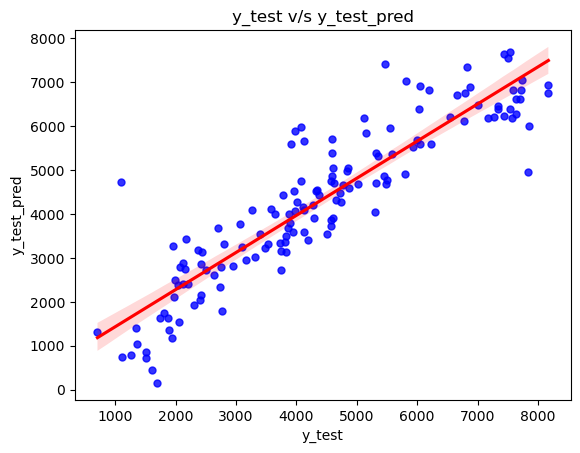

In [153]:
# Visualize the predicted model using a scatter plot with a linear regression fit line
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('y_test v/s y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

In [154]:
# Calculate mean squared error of the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
rmse_test = np.sqrt(mse_test)

print(rmse_test)

826.8743701272676


In [155]:
# Coefficients of the final model
round(model.params, 2)

const                  544.30
year                  2039.65
workingday             475.41
temperature           4780.43
windspeed             -672.76
season_summer          773.10
season_winter         1189.76
month_Sept             908.44
weekday_Sat            536.77
weather_Mist          -706.68
weather_Light_rain   -2515.04
dtype: float64

### Equation of the best fit line

In a multivariate linear regression model, the equation of the best-fit line is given by:

𝑌=
  𝛽0
  +
  𝛽1𝑋1
  +
  𝛽2𝑋2
  +
  …
  +
  𝛽𝑛𝑋𝑛
 
( Y ): Dependent variable (the variable being predicted), cnt in this case.

(  𝛽0
  ): Y-intercept

(  𝛽1
 ,  𝛽2
 ,  …
 ,  𝛽𝑛
  ): Coefficients for the independent variables (  𝑋1
 ,  𝑋2
 ,  …
 ,  𝑋𝑛
  ) respectively.

The coefficients are determined through a process that minimizes the sum of squared differences between predicted and actual values. The resulting line provides the best linear fit to the multivariate data.

For our model, the best fit line is determined by the following equation:

***count*** = 544.30 + 2039.65 x ***year*** + 475.41 x ***workingday*** + 4780.43 x ***temperature*** - 672.76 x ***windspeed*** + 773.10 x ***season_Summer*** + 1189.76 x ***season_Winter*** + 908.44 x ***month_Sept*** + 536.77 x ***weekday_Sat*** - 706.68x***weather_Mist*** - 2515.04x***weather_Light_rain***

#### Comparing  𝑅2 Scores and Adjusted  𝑅2 Scores for training and test set

In [156]:
# Get R2 Score for Training set
r2_score_train = round(model.rsquared, 2)
adj_r2_score_train = round(model.rsquared_adj, 2)

# Print the R2 and Adjusted R2 scores for the training and the test set
print(f'Training Set: \tR2 - {format(r2_score_train, ".3f")}\n\t\tAdjusted R2 - {format(adj_r2_score_train, ".3f")}\n')
print(f'Test Set: \tR2 - {format(r2_score_test, ".3f")}\n\t\tAdjusted R2 - {format(adj_r2_score_test, ".3f")}')

Training Set: 	R2 - 0.820
		Adjusted R2 - 0.820

Test Set: 	R2 - 0.820
		Adjusted R2 - 0.800


- Training Set R2 and Adjusted R2: Both values are quite high (0.820 and 0.820), indicating that the model explains a significant portion of the variance in the training data.
- Test Set R2 and Adjusted R2: These values are slightly lower (0.820 and 0.800) than the training set values, but they are still quite high. This indicates that the model generalizes well to unseen data.

# Observations

## Which variables are significant in predicting the demand for shared bikes?

#### Variables and Their Significance:

- **const (544.30):** The intercept term, which represents the baseline demand for shared bikes when all other variables are zero.

- **year (2039.65):** Significant positive influence: Bike demand increases significantly with each passing year, suggesting an overall upward trend in the popularity of bike-sharing programs.

- **workingday (475.41):** Significant positive influence: Higher bike demand on working days compared to non-working days, indicating that bike-sharing is commonly used for commuting.

- **temperature (4780.43):** Strong positive influence: Higher temperatures significantly increase bike demand, as people are more likely to use bikes in comfortable weather.

- **windspeed (-672.76):** Significant negative influence: Higher wind speeds decrease bike demand, likely because biking in windy conditions is less appealing.

- **season_summer (773.10):** Significant positive influence: Higher bike demand in summer compared to the baseline season (likely spring), possibly due to better weather and more recreational activities.

- **season_winter (1189.76):** Significant positive influence: Surprisingly higher bike demand in winter compared to the baseline season, which may be influenced by local cultural or climatic factors.

- **month_Sept (908.44):** Significant positive influence: Higher bike demand in September compared to the baseline month (likely January), possibly due to favorable weather and return to school/work.

- **weekday_Sat (536.77):** Significant positive influence: Higher bike demand on Saturdays compared to the baseline weekday (likely Monday), suggesting increased recreational use.

- **weather_Mist (-706.68):** Significant negative influence: Reduced bike demand in misty weather compared to the baseline weather condition (likely clear weather).

- **weather_Light_rain (-2515.04):** Strong negative influence: Significantly lower bike demand in light rain, indicating adverse weather greatly reduces the likelihood of using shared bikes.

# Recommendations

## How well those variables describe the bike demands?

**1) Leverage Seasonal and Monthly Trends:**

Promote Bike Sharing During Peak Seasons and Months: Since demand is higher in summer, winter, and September, the company should focus marketing efforts and promotions during these times. Special discounts or membership deals can be offered to attract more users.
Prepare for Lower Demand in Off-Peak Periods: During periods with typically lower demand (e.g., certain months or seasons not highlighted), consider maintenance or upgrades to the bike fleet. This can also be a time to offer targeted promotions to boost usage.

**2) Focus on Working Days:**

Enhance Services for Commuters: Since demand is higher on working days, consider implementing commuter-friendly services such as bike stations near major office areas, extended hours of operation, and partnerships with companies to provide employee discounts.
Provide Flexible Memberships: Offer flexible membership options catering specifically to daily commuters, like workday-only memberships.

**3) Adapt to Weather Conditions:**

Incentivize Usage in Mild Weather: As demand increases with higher temperatures and decreases with wind and rain, the company can provide incentives to ride during mild weather conditions. For instance, offer discounts or bonuses for riding on days with good weather forecasts.
Weather-Related Adjustments: Enhance the user experience with weather-resistant gear such as rain covers or windbreakers, and provide real-time weather updates and recommendations through the company’s app.

**4) Marketing and Promotions on Weekends:**

Boost Weekend Usage: Since Saturdays see higher demand, create weekend-specific promotions and events to attract more recreational riders. Organize community rides, themed biking events, or collaborations with local businesses to enhance the weekend biking experience.

**5) Capitalize on Yearly Trends:**

Annual Growth: With a significant positive trend over the years, continue investing in infrastructure and expanding the bike network. Regularly review and update service offerings to keep pace with the growing user base and evolving market trends.

**6) Targeted Interventions for Specific Weather Conditions:**

Reduce Impact of Adverse Weather: Implement strategies to mitigate the drop in demand during misty or rainy weather. This could include offering discounted rides, improving bike station coverage with sheltered docking stations, and providing incentives for those willing to ride despite less favorable weather.

**7) Community Engagement and Education:**

Promote the Benefits of Bike Sharing: Increase community outreach and educational campaigns to raise awareness about the benefits of bike-sharing for health, the environment, and urban mobility. Highlighting these benefits can drive higher adoption rates.

**8) Data-Driven Decision Making:**

Continuous Monitoring: Regularly monitor and analyze usage data to identify new trends or shifts in demand. This can help the company stay agile and responsive to changing user needs and preferences.
Feedback Mechanism: Implement feedback mechanisms to gather user input on service improvements and address any emerging issues promptly.

By focusing on these areas, the bike-sharing company can enhance its services, improve user satisfaction, and increase overall demand for shared bikes. The combination of strategic promotions, infrastructure improvements, and responsive service adjustments will help capitalize on the identified significant factors influencing bike demand.